<a href="https://colab.research.google.com/github/Ad7amstein/Linear_Regression-E-commerce/blob/main/ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Project: E-Commerce
### Table of contents:
- [Goals](#goals)
- [Tools](#tools)
- [Loading Exploring the data](#ld_exp)
- [Plots & Visualizations](#plt_vis)
- [Extracting and splitting the main features and targets](#ex_splt)
- [Prediction && Accuracy](#pred_acc)
- [Compute Cost With Multiple Variables](#cost)
- [Gradient Descent With Multiple Variables](#grd_desc)
- [Hyperparameters](#hyp_prm)
- [Normalization (Scaling the features)](#norm)
- [Ealuating the classifier](#eval)

## <a name=goals>Goals<a>
In this project, we will:
- Discovering E-commerce Dataset
- Implement a linear regression model to predict the `Yearly Abount Spent` based on some features
- Implement a gradient descent to imporve the prediction
- Improve the accuracy

## <a name="tools">Tools<a>
In this project, we will make use of:
- math, This module provides access to the mathematical functions defined by the C standard
- pandas, a Python library used for working with data sets
- NumPy, a popular library for scientific computing
- seaborn, a Python data visualization library based on matplotlib
- Matplotlib, a popular library for plotting data

In [ ]:
import copy, math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <a name="ld_exp">Loading Exploring the data<a>

In [ ]:
# Load the data set
url = 'https://raw.githubusercontent.com/Ad7amstein/Linear_Regression-E-commerce/main/Ecommerce%20Customers.csv'
data = pd.read_csv(url)

In [ ]:
# Print 5 records
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Above, we can see that there is 3 categorical features and 4 numerical features and 1 numerical target.
Next, we will discover the data to see some plots explaning the relations we have in the data

In [ ]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Above, we can see that we have `500` entries. There is no nulls in the data

In [ ]:
# information about numberical features and target
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Above, we can use this information later to see if we are on the right path.
Next, we will visualize the data and see some cool plots to understand the data well

### <a name="plt_vis">Plots & Visualizations<a>

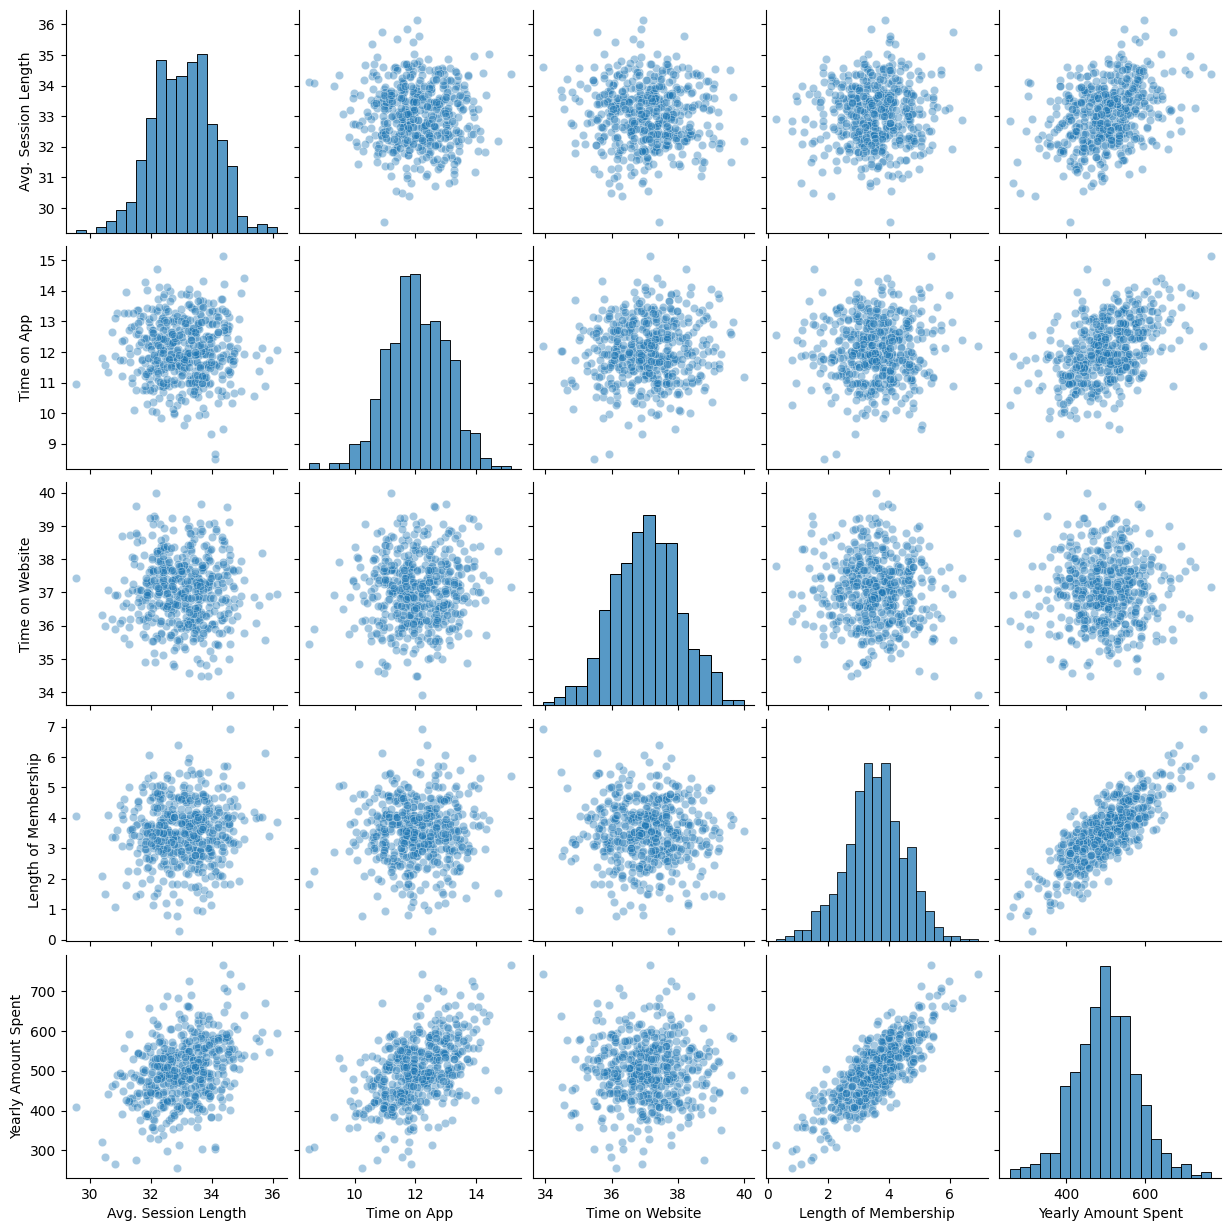

In [ ]:
# draw a pair plot
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.4})

Let's Plot each features vs. the target

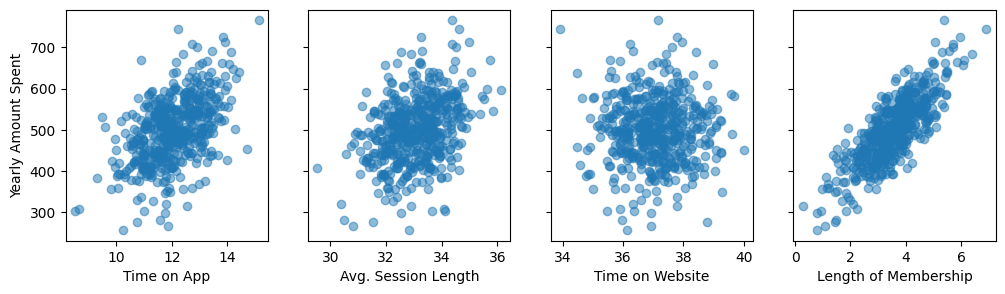

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 3))

ax[0].set_ylabel('Yearly Amount Spent')

ax[0].set_xlabel('Time on App')
ax[1].set_xlabel('Avg. Session Length')
ax[2].set_xlabel('Time on Website')
ax[3].set_xlabel('Length of Membership')

ax[0].scatter(x='Time on App', y='Yearly Amount Spent', data=data, alpha=0.5)
ax[1].scatter(x='Avg. Session Length', y='Yearly Amount Spent', data=data, alpha=0.5)
ax[2].scatter(x='Time on Website', y='Yearly Amount Spent', data=data, alpha=0.5)
ax[3].scatter(x='Length of Membership', y='Yearly Amount Spent', data=data, alpha=0.5)

# ax[0].set_title('Time on App vs. Yearly Amount Spent')
# ax[1].set_title('Avg. Session Length vs. Yearly Amount Spent')
# ax[2].set_title('Time on Website vs. Yearly Amount Spent')
# ax[3].set_title('Length of Membership vs. Yearly Amount Spent')

plt.show()

Above, is a pair plot to see the realation between each to features. we will focus on the realtion betweeen the features and the target. we can see that there is no clear coorealation except between:
- `Length of Membership` and `Yearly Amount Spent`
- `Time on App` and `Yearly Amount Spent`<br><br>
so let's focus on them

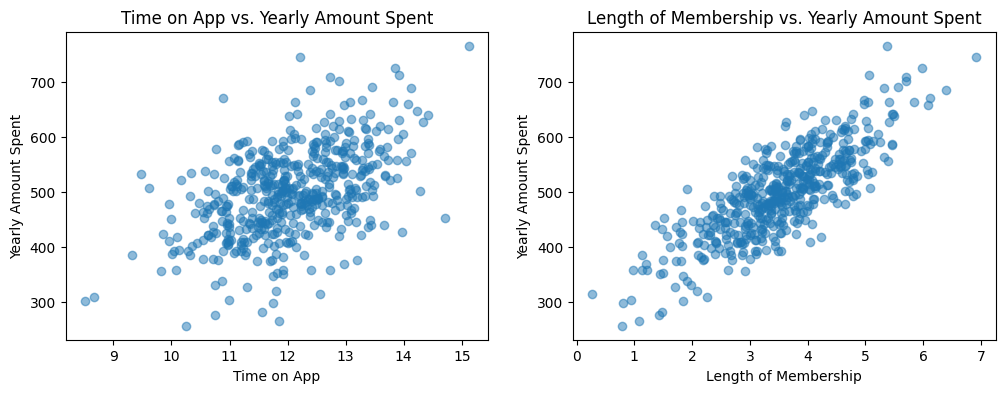

In [ ]:
# Focus on 'Time on App' and 'Length of Membership' features
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.set_ylabel('Yearly Amount Spent')  ;  ax2.set_ylabel('Yearly Amount Spent')
ax1.set_xlabel('Time on App')          ;  ax2.set_xlabel('Length of Membership')

ax1.scatter(x='Time on App', y='Yearly Amount Spent', data=data, alpha=0.5)
ax2.scatter(x='Length of Membership', y='Yearly Amount Spent', data=data, alpha=0.5)

ax1.set_title('Time on App vs. Yearly Amount Spent')
ax2.set_title('Length of Membership vs. Yearly Amount Spent')

plt.show()

Above the can see clearly the realations we have discussed<br>
Next, let's see a basic linear fit for each one

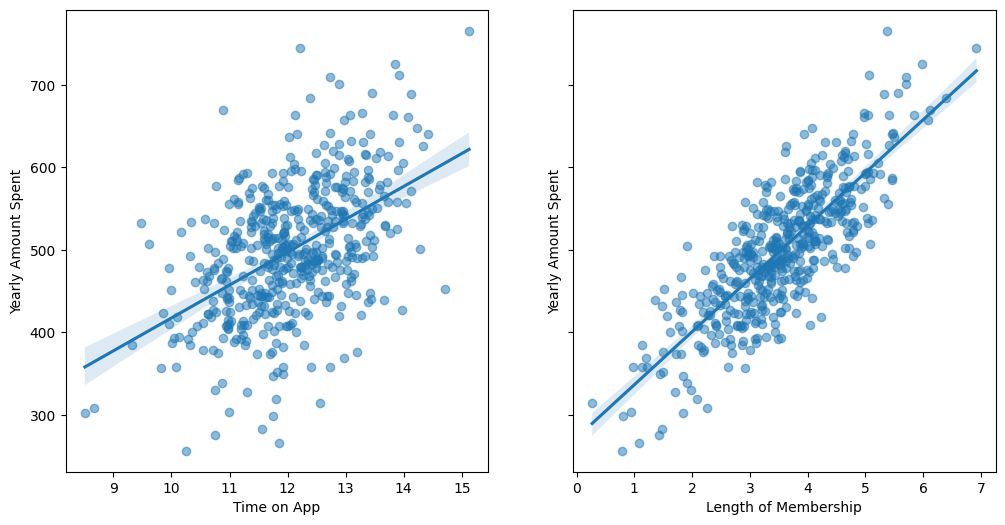

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

sns.regplot(x='Time on App',
           y='Yearly Amount Spent',
           data=data,
           scatter_kws={'alpha':0.5},
           ax=ax1)

sns.regplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=data,
           scatter_kws={'alpha':0.5},
           ax=ax2)

plt.show()

Above we can see clearly that the realation between the two features `Leangth of Membership` and `Time on App` and the target $y$ is a direct realation.<br>
Now let's build the linear model

## <a name="ex_splt">Extracting and splitting the main features and targets<a>

First we need to extract the features $X$ and the targets $y$

In [ ]:
# extract the four main features
X = data.values[:, 3:7]
y = data.values[:, 7]

print("X = \n", X, ",  X.shape =", X.shape, "X 2-D array\n")
print("y[:10] = \n", y[:10], ",  y.shape =", y.shape, "y 1-D array")

X = 
 [[34.49726772511229 12.655651149166752 39.57766801952616
  4.082620632952961]
 [31.92627202636016 11.109460728682564 37.268958868297744
  2.66403418213262]
 [33.000914755642675 11.330278057777512 37.11059744212085
  4.104543202376424]
 ...
 [32.64677668060689 11.499409061002083 38.33257633196044
  4.958264472618698]
 [33.322501051305466 12.391422991118318 36.84008572976701
  2.336484668112853]
 [33.71598091844986 12.418808324753911 35.771016191612965
  2.735159567082275]] ,  X.shape = (500, 4) X 2-D array

y[:10] = 
 [587.9510539684005 392.2049334443264 487.54750486747207 581.8523440352178
 599.4060920457634 637.102447915074 521.5721747578274 549.9041461052942
 570.2004089636195 427.19938489532814] ,  y.shape = (500,) y 1-D array


Now let's split $X$ to two parts `train` and `test`

In [ ]:
def my_train_test_split(X, y, train_size,test_size=None):
  """
  Split the data to train and test
  Args:
    X (ndarray (m,n)) : Data, m examples and n features
    y (ndarray (m, )) : target values
    test_size (float) : size of the test data
    train_size (float): size of the training data
  Returns:
    X_train (ndarray(,n)): training data
    X_test  (ndarray(,n)): test data
    y_train (ndarray())  : training targets
    y_test  (ndarray())  : test targets
    """

  # number of examples and features
  m, n = X.shape

  train_examples = int(m * train_size)

  X_train = X[:train_examples, :]
  X_test  = X[train_examples:, :]
  y_train = y[:train_examples]
  y_test  = y[train_examples:]

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = my_train_test_split(X, y, train_size=0.7)

print("X_train = \n", X_train[:5], ",  X_train.shape =", X_train.shape, "X 2-D array\n")
print("X_test = \n", X_test[:5], ",  X_test.shape =", X_test.shape, "X 2-D array\n")
print("y_train = \n", y_train[:5], ",  y_train.shape =", y_train.shape, "y 1-D array\n")
print("y_test = \n", y_test[:5], ",  y_test.shape =", y_test.shape, "y 1-D array\n")

X_train = 
 [[34.49726772511229 12.655651149166752 39.57766801952616
  4.082620632952961]
 [31.92627202636016 11.109460728682564 37.268958868297744
  2.66403418213262]
 [33.000914755642675 11.330278057777512 37.11059744212085
  4.104543202376424]
 [34.30555662975554 13.717513665142508 36.72128267790313
  3.120178782748092]
 [33.33067252364639 12.795188551078114 37.53665330059473
  4.446308318351435]] ,  X_train.shape = (350, 4) X 2-D array

X_test = 
 [[33.30433661798984 12.692661429739388 37.33359061333867
  3.827375915107567]
 [32.189844729273545 11.386775551280651 38.19748324839899
  4.808320372869162]
 [34.935605105644306 10.728418539377822 36.88119240747175
  4.048510087289211]
 [33.55165060797954 11.936895159842097 35.90025278215821
  4.5433324132930855]
 [32.38696867463189 12.717995102314037 35.12882235312117
  3.4810621331251683]] ,  X_test.shape = (150, 4) X 2-D array

y_train = 
 [587.9510539684005 392.2049334443264 487.54750486747207 581.8523440352178
 599.4060920457634] ,  

## <a name="pred_acc">Prediction && Accuracy<a>
We will build linear regression model so the prediction will be:<br>
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{1} $$
<br><br>
The most widely used formula to calculate the accuracy is r2_score so we will use it:
$$R^2=1-\frac{RSS}{TSS}\tag{2}$$<br>
Where:
$$RSS=\sum\limits_{i = 0}^{m-1} (y^{(i)} - f_{\mathbf{w},b}(\mathbf{x}^{(i)}))^2 \tag{3}$$<br>
$$TSS=\sum\limits_{i = 0}^{m - 1} (y^{(i)} - y̅)^2\tag{4}$$<br>
$$y̅=\frac{1}{m}\sum\limits_{i=0}^{m-1} (y^{(i)})\tag{5}$$

In [ ]:
def predict(X, w, b):
    """
    single predict using linear regression
    Args:
      X (ndarray): Shape (m, n) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
     """

    p = np.dot(X, w) + b
    return p


In [ ]:
def _r2_score(X, y, w, b):
    """
    Returns the accuracy of the model
    Args:
    X (ndarray): Shape(m, n) examples with multiple features
    y (ndarray): Shape (m,) the actual target values
    w (ndarray): Shape (n,) model parameters
    b (scalar) : model parameter

    Returns:
      accuracy (scalar): the accuracy of the model
    """
    m, n = X.shape
    RSS = 0.
    TSS = 0.
    y_mu = np.mean(y)

    for i in range(m):
        RSS += (y[i] - predict(X[i], w, b)) ** 2
        TSS += (y[i] - y_mu) ** 2

    score = 1 - RSS / TSS
    print("The accuracy of our model is {}%".format(round(score, 2) * 100))


## <a name="cost">Compute Cost With Multiple Variables<a>
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{1}$$


In [ ]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      X (ndarray (m,n)): Data, m examples and n features
      y (ndarray (m,)): target values
      w (ndarray (m,)): model parameters
      b (scalar)    : model parameter

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
      f_wb_i = predict(X[i], w, b);
      cost += (f_wb_i - y[i]) ** 2

    cost /= (2 * m)

    return cost

Now let's make initial values for the parameters and compute the cost

In [ ]:
# intial values for parameters w and b
w_init = np.array([0.5, 1., 0.4, 1.5])
b_init = 5

print("The Cost of our model is {}".format(compute_cost(X_train, y_train, w_init, b_init)))
_r2_score(X_test, y_test, w_init, b_init)

The Cost of our model is 102972.02817366531
The accuracy of our model is -3200.0%


That's a BIG COST !!!<br>
let's implement a gradient descent to choose the best parameters and reduces the cost

## <a name="grd_desc">Gradient Descent With Multiple Variables<a>
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """

    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
      f_wb_i = predict(X[i], w, b)
      err = (f_wb_i - y[i])
      dj_dw = dj_dw + (err * X[i])
      dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    W_history = []
    b_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    print("  Iteration Cost          w0          w1          w2          w3           b         djdw0       djdw1       djdw2       djdw3        djdb   ")
    print("---------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------")
    for i in range(num_iters):
      dj_dw, dj_db = gradient_function(X, y, w, b)
      w = w - (alpha * dj_dw)
      b -= alpha * dj_db

      if i < 100000:
        J_history.append(cost_function(X, y, w, b))
        W_history.append(copy.deepcopy(w))
        b_history.append(copy.deepcopy(b))

      # Print cost every at intervals 10 times or as many iterations if < 10
      if i % math.ceil(num_iters / 10) == 0:
        print("{:>8} {:>11.5e} {:>10.1e} {:>11.1e} {:>11.1e} {:>11.1e} {:>11.1e} {:>11.1e} {:>11.1e} {:>11.1e} {:>11.1e} {:>11.1e}".format(
              i, cost_function(X, y, w, b), *w, b, *dj_dw, dj_db))

        # Print the final weights and bias found by gradient descent
        # print("_" * 80)
        # print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history, W_history, b_history


Now let's test the implementaion

## <a name="hyp_prm">Hyperparameters<a>

Let's try some initial hyperparameters

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 2.0e-7
# run gradient descent
w_final, b_final, J_hist, W_hist, b_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(5):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

  Iteration Cost          w0          w1          w2          w3           b         djdw0       djdw1       djdw2       djdw3        djdb   
---------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------
       0 1.28472e+05    3.3e-03     1.2e-03     3.7e-03     3.7e-04     1.0e-04    -1.7e+04    -6.1e+03    -1.9e+04    -1.8e+03    -5.0e+02
    1000 4.68102e+04    2.6e+00     9.5e-01     2.9e+00     2.9e-01     7.8e-02    -9.8e+03    -3.6e+03    -1.1e+04    -1.1e+03    -3.0e+02
    2000 1.82554e+04    4.1e+00     1.5e+00     4.6e+00     4.7e-01     1.2e-01    -5.8e+03    -2.2e+03    -6.5e+03    -6.8e+02    -1.7e+02
    3000 8.27012e+03    5.0e+00     1.9e+00     5.6e+00     5.7e-01     1.5e-01    -3.4e+03    -1.3e+03    -3.8e+03    -4.3e+02    -1.0e+02
    4000 4.77788e+03    5.5e+00     2.1e+00     6.2e+00     6.4e-01     1.7e-01    -2.0e+03    -7.7e+02    -2.2e+03    -2.8e+02    -6.1e+01
    5000 3.55604

Let's Test the model

In [ ]:
print("The cost of our model is {}".format(compute_cost(X_train, y_train, w_final, b_final)))
_r2_score(X_test, y_test, w_final, b_final)

The cost of our model is 2897.54612704671
The accuracy of our model is 8.0%


This is very bad accuracy<br>
let's see how to improve that. first we can think of increases the number of iteraions. well this may work but is timeconsuming. how we can make it faster ?<br>
we can increase the learning rate $a$ to make the step faster.<br>
Let's try this.

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 100000
alpha = 1.0e-4
# run gradient descent
w_final, b_final, J_hist, W_hist, b_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(5):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

  Iteration Cost          w0          w1          w2          w3           b         djdw0       djdw1       djdw2       djdw3        djdb   
---------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------
       0 7.12494e+04    1.7e+00     6.1e-01     1.9e+00     1.8e-01     5.0e-02    -1.7e+04    -6.1e+03    -1.9e+04    -1.8e+03    -5.0e+02
   10000 5.75484e+02    1.2e+01     2.3e+01    -7.9e+00     3.9e+01    -2.3e-01    -2.1e+00    -1.2e+01     7.8e+00    -2.2e+01     4.1e-01
   20000 2.91024e+02    1.3e+01     3.0e+01    -1.2e+01     5.2e+01    -6.4e-01    -1.3e-01    -4.6e+00     2.3e+00    -7.6e+00     4.0e-01
   30000 2.55094e+02    1.2e+01     3.3e+01    -1.4e+01     5.7e+01    -1.0e+00     1.7e-01    -1.7e+00     6.6e-01    -2.7e+00     3.9e-01
   40000 2.50290e+02    1.2e+01     3.4e+01    -1.4e+01     5.9e+01    -1.4e+00     1.4e-01    -6.6e-01     1.7e-01    -9.8e-01     3.9e-01
   50000 2.49512

Now Let's test

In [ ]:
print("The cost of our model is {}".format(compute_cost(X_train, y_train, w_final, b_final)))
_r2_score(X_test, y_test, w_final, b_final)

The cost of our model is 248.64964983483625
The accuracy of our model is 91.0%


That's Great !<br>
Now let's visulaize

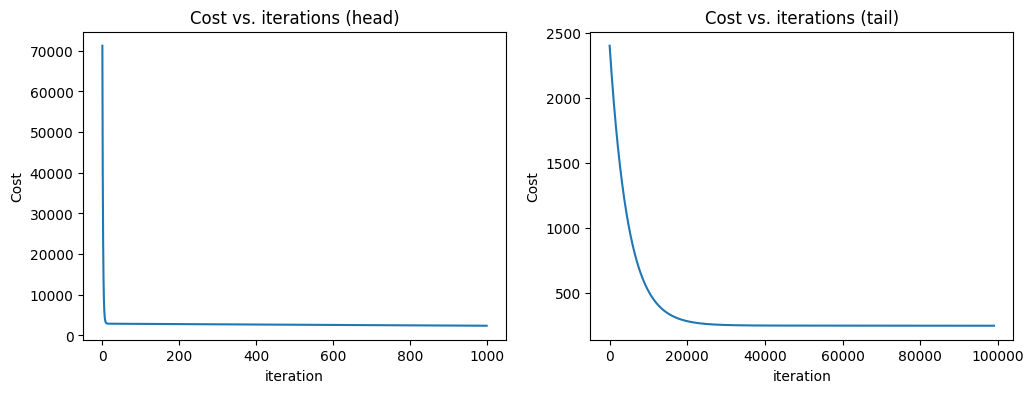

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax1.plot(J_hist[:1000])
ax1.set(xlabel='iteration', ylabel='Cost',
       title='Cost vs. iterations (head)')

ax2.plot(J_hist[1000:])
ax2.set(xlabel='iteration', ylabel='Cost',
        title='Cost vs. iterations (tail)')

plt.show()

Above we can see that the cost converges at nearly 2800 at the 450th iteration

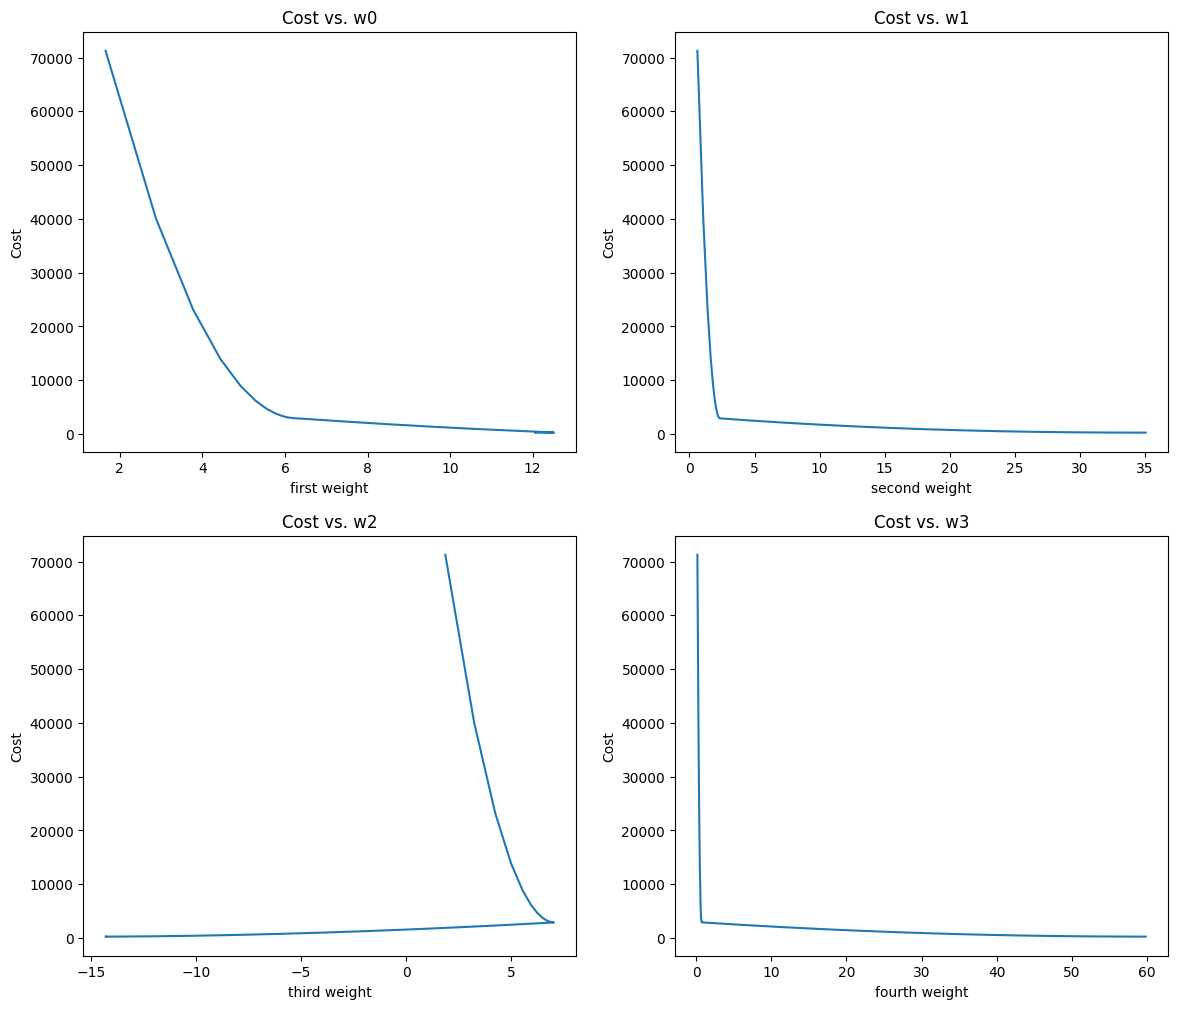

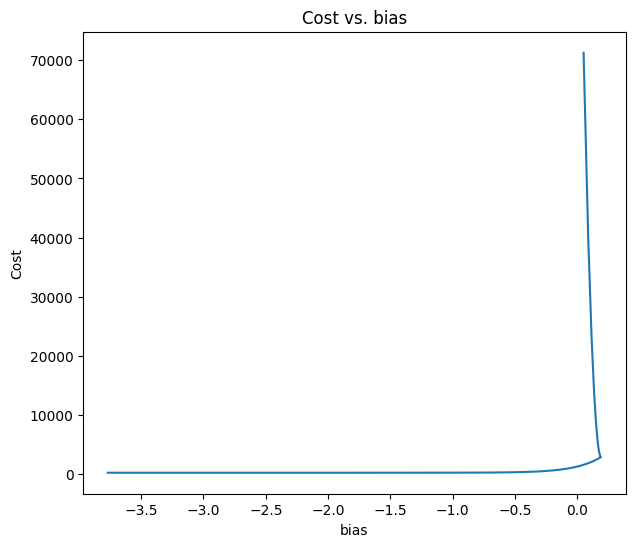

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
w0 = [array[0] for array in W_hist]
w1 = [array[1] for array in W_hist]
w2 = [array[2] for array in W_hist]
w3 = [array[3] for array in W_hist]

ax1.plot(w0, J_hist)
ax1.set(ylabel='Cost', xlabel='first weight', title='Cost vs. w0')
ax2.plot(w1, J_hist)
ax2.set(ylabel='Cost', xlabel='second weight', title='Cost vs. w1')
ax3.plot(w2, J_hist)
ax3.set(ylabel='Cost', xlabel='third weight', title='Cost vs. w2')
ax4.plot(w3, J_hist)
ax4.set(ylabel='Cost', xlabel='fourth weight', title='Cost vs. w3')

fig, ax5 = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
ax5.plot(b_hist, J_hist)
ax5.set(ylabel='Cost', xlabel='bias', title='Cost vs. bias')

plt.show()

Hmmm!!, Seems like there is something's wrong. That is some parameter like $w0$ and $w2$.They reaches thier near final value quickly<br> and there are other parameters updated slowly. this problem occurse because of the ranges of our features values. so we need to make a normalization to scale the features on the same range.

## <a name="norm">Normalization (Scaling the features)<a>
Now we will apply Z-Score normalization on the features


### z-score normalization
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{1}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{2}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{3}
\end{align}
$$

**Implementation**

In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    m, n = X.shape
    X = np.array(X)
    mu = np.mean(X, axis=0)
    sigma = np.zeros((n,))
    for i in range(m):
      for j in range(n):
        sigma[j] += (X[i][j] - mu[j]) ** 2
    sigma /= m
    sigma = np.sqrt(sigma)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

Now let's have a look at the distribution of the features before and after the normalization

[Text(0.5, 0, 'Length of Membership')]

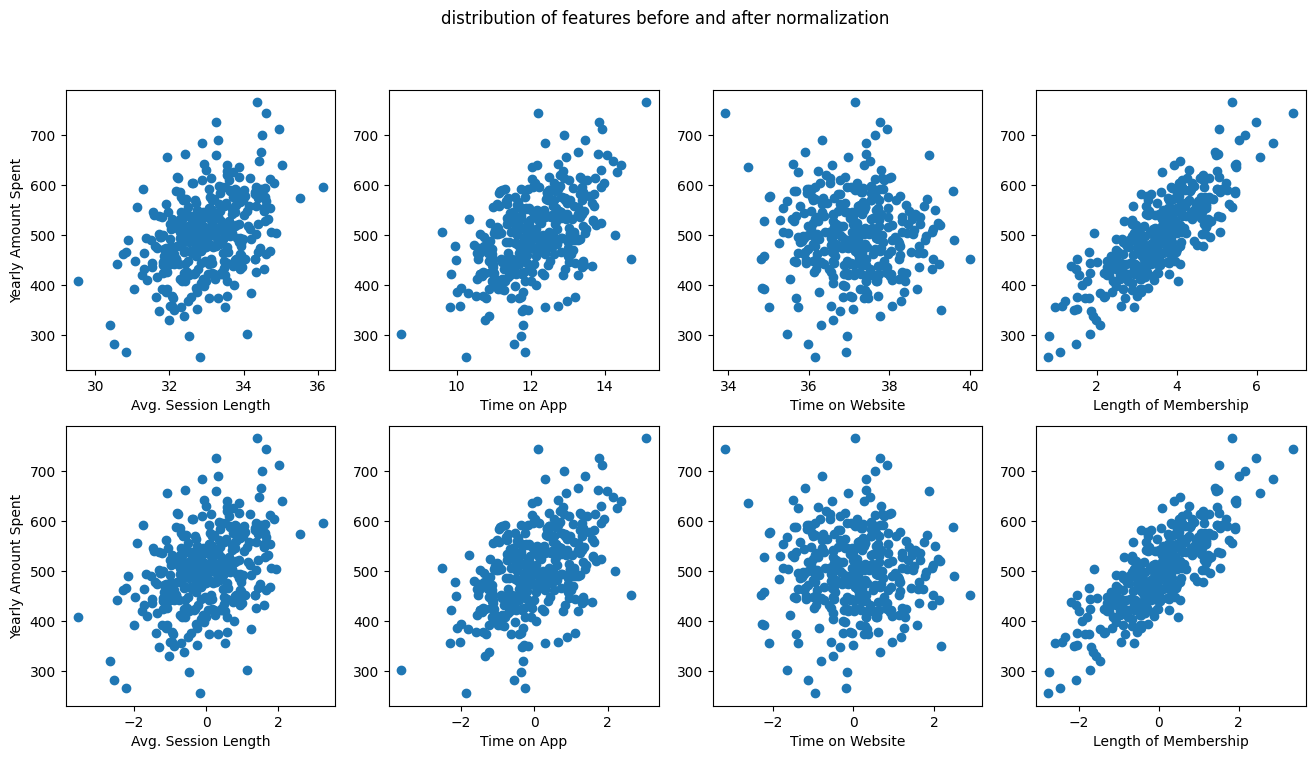

In [ ]:
X_norm, mu, sigma = zscore_normalize_features(X_train)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("distribution of features before and after normalization")

ax[0][0].scatter(X_train[:,0], y_train)
ax[0][0].set(xlabel="Avg. Session Length", ylabel="Yearly Amount Spent")

ax[0][1].scatter(X_train[:,1], y_train)
ax[0][1].set(xlabel="Time on App")

ax[0][2].scatter(X_train[:,2], y_train)
ax[0][2].set(xlabel="Time on Website")

ax[0][3].scatter(X_train[:,3], y_train)
ax[0][3].set(xlabel="Length of Membership")

ax[1][0].scatter(X_norm[:,0], y_train)
ax[1][0].set(xlabel="Avg. Session Length", ylabel="Yearly Amount Spent")

ax[1][1].scatter(X_norm[:,1], y_train)
ax[1][1].set(xlabel="Time on App")

ax[1][2].scatter(X_norm[:,2], y_train)
ax[1][2].set(xlabel="Time on Website")

ax[1][3].scatter(X_norm[:,3], y_train)
ax[1][3].set(xlabel="Length of Membership")



Now all the feature have the range from -2 to 2<br>
Let's run the model again and see if this make any difference

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 100000
alpha = 1.0e-4
# run gradient descent
w_final, b_final, J_hist, W_hist, b_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_norm.shape
for i in range(5):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

  Iteration Cost          w0          w1          w2          w3           b         djdw0       djdw1       djdw2       djdw3        djdb   
---------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------
       0 1.28578e+05    3.2e-03     4.0e-03    -2.2e-04     6.4e-03     5.0e-02    -3.2e+01    -4.0e+01     2.2e+00    -6.4e+01    -5.0e+02
   10000 1.73796e+04    1.8e+01     2.5e+01    -6.9e-01     4.0e+01     3.2e+02    -9.2e+00    -1.4e+01    -1.5e-01    -2.2e+01    -1.8e+02
   20000 2.38644e+03    2.3e+01     3.3e+01    -3.6e-01     5.3e+01     4.3e+02    -2.5e+00    -4.8e+00    -3.8e-01    -7.9e+00    -6.8e+01
   30000 3.62920e+02    2.5e+01     3.6e+01    -3.1e-02     5.8e+01     4.8e+02    -6.1e-01    -1.7e+00    -2.5e-01    -2.8e+00    -2.5e+01
   40000 8.95947e+01    2.5e+01     3.7e+01     1.6e-01     6.0e+01     4.9e+02    -1.2e-01    -5.7e-01    -1.3e-01    -1.0e+00    -9.2e+00
   50000 5.26488

That's Great so we have reached a good parameters

## <a name="eval">Ealuating the classifier<a>
Now let's test the model and see how it's work

In [ ]:
# Assuming you have the predictions for X_test using your model
X_test_norm, mu, sigma = zscore_normalize_features(X_test)
print("The cost of our model is {}".format(compute_cost(X_norm, y_train, w_final, b_final)))
_r2_score(X_test_norm, y_test, w_final, b_final)

The cost of our model is 46.86936805028217
The accuracy of our model is 98.0%


Wow!, This is a big milestone now we can say that our model is pretty well, and ready for the real world! 🥰